In [67]:
# As always, start by importing the required Python libraries.
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist

In [68]:
# let us load the image
light_image = imread('46111b95-1192-425a-9542-9250a4da93f9.jpg')

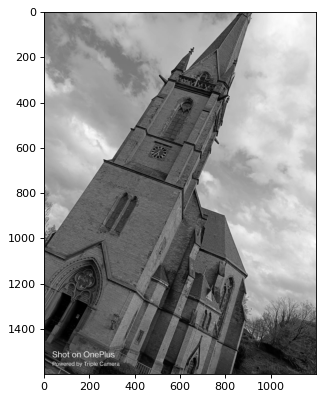

In [69]:
# As a start, let us convert our image into greyscale
light_image_grey = rgb2gray(light_image)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(light_image_grey, cmap='gray')

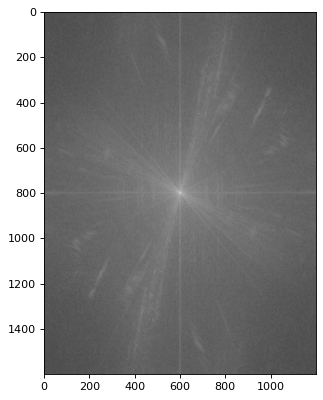

In [70]:
# from here we can now easily use the fft function found in Skimage.
light_image_grey_fourier = np.fft.fftshift(np.fft.fft2(light_image_grey))
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(light_image_grey_fourier)), cmap='gray');

#### * In the image we can see two very clear distortions. The white vertical and horizontal lines refer to the sharp horizontal and vertical elements of the image. Let us see what happens if we mask one of them.

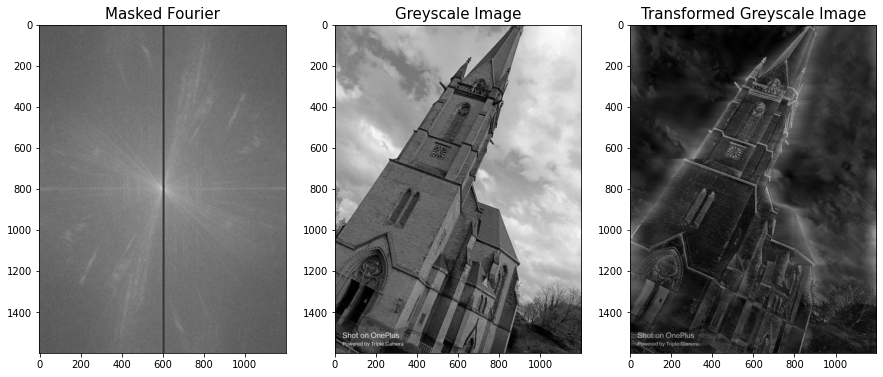

In [71]:
def fourier_masker_ver(image, i):
    f_size = 15
    light_image_grey_fourier = np.fft.fftshift(np.fft.fft2(rgb2gray(image)))
    
    light_image_grey_fourier[:800, 600:610] = i
    light_image_grey_fourier[-800:,600:610] = i
    fig, ax = plt.subplots(1,3,figsize=(15,15))
    ax[0].imshow(np.log(abs(light_image_grey_fourier)), cmap='gray')
    ax[0].set_title('Masked Fourier', fontsize = f_size)
    ax[1].imshow(rgb2gray(image), cmap = 'gray')
    ax[1].set_title('Greyscale Image', fontsize = f_size);
    ax[2].imshow(abs(np.fft.ifft2(light_image_grey_fourier)), 
                     cmap='gray')
    ax[2].set_title('Transformed Greyscale Image', 
                     fontsize = f_size);
    
fourier_masker_ver(light_image, 1)

#### let us see what would happen if we masked the horizontal line instead.

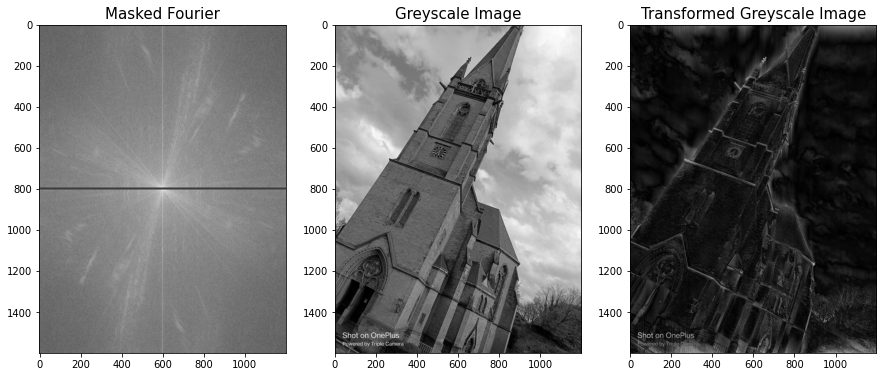

In [72]:
def fourier_masker_hor(image, i):
    f_size = 15
    light_image_grey_fourier = np.fft.fftshift(np.fft.fft2(rgb2gray(image)))
    
    light_image_grey_fourier[795:805, :600] = i
    light_image_grey_fourier[795:805,-600:] = i
    fig, ax = plt.subplots(1,3,figsize=(15,15))
    ax[0].imshow(np.log(abs(light_image_grey_fourier)), cmap='gray')
    ax[0].set_title('Masked Fourier', fontsize = f_size)
    ax[1].imshow(rgb2gray(image), cmap = 'gray')
    ax[1].set_title('Greyscale Image', fontsize = f_size);
    ax[2].imshow(abs(np.fft.ifft2(light_image_grey_fourier)), 
                     cmap='gray')
    ax[2].set_title('Transformed Greyscale Image', 
                     fontsize = f_size);
fourier_masker_hor(light_image, 1)

#### Though we'll keep to masking the Fourier Transformation's vertical line (remember that this smudges the horizontal lines when transformed back into the original image), let's play around with different levels of masking.

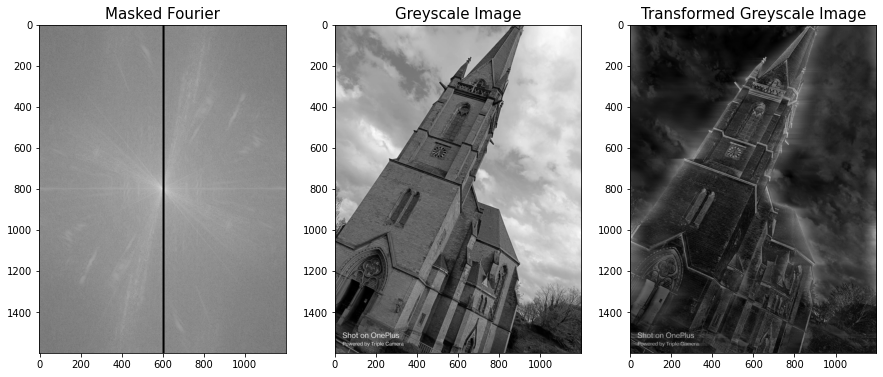

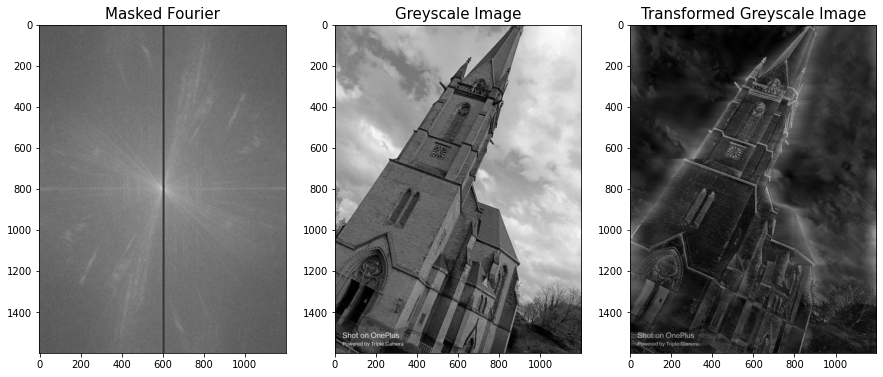

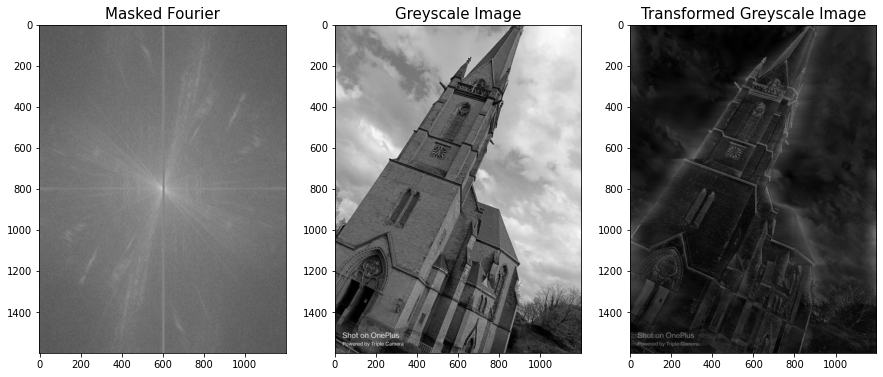

In [73]:
def fourier_iterator(image, value_list):
    for i in value_list:
        fourier_masker_ver(image, i)
 
fourier_iterator(light_image, [0.001, 1, 100])

#### Let us enact Fourier Transformation adjustment while retaining the colors of the original image.

In [74]:
def fourier_transform_rgb(image):
    f_size = 25
    transformed_channels = []
    for i in range(3):
        rgb_fft = np.fft.fftshift(np.fft.fft2((image[:, :, i])))
        rgb_fft[:225, 235:237] = 1
        rgb_fft[-225:,235:237] = 1
        transformed_channels.append(abs(np.fft.ifft2(rgb_fft)))
    
    final_image = np.dstack([transformed_channels[0].astype(int), 
                             transformed_channels[1].astype(int), 
                             transformed_channels[2].astype(int)])
    
    fig, ax = plt.subplots(1, 2, figsize=(17,12))
    ax[0].imshow(image)
    ax[0].set_title('Original Image', fontsize = f_size)
    ax[0].set_axis_off()
    
    ax[1].imshow(final_image)
    ax[1].set_title('Transformed Image', fontsize = f_size)
    ax[1].set_axis_off()
    
    fig.tight_layout()

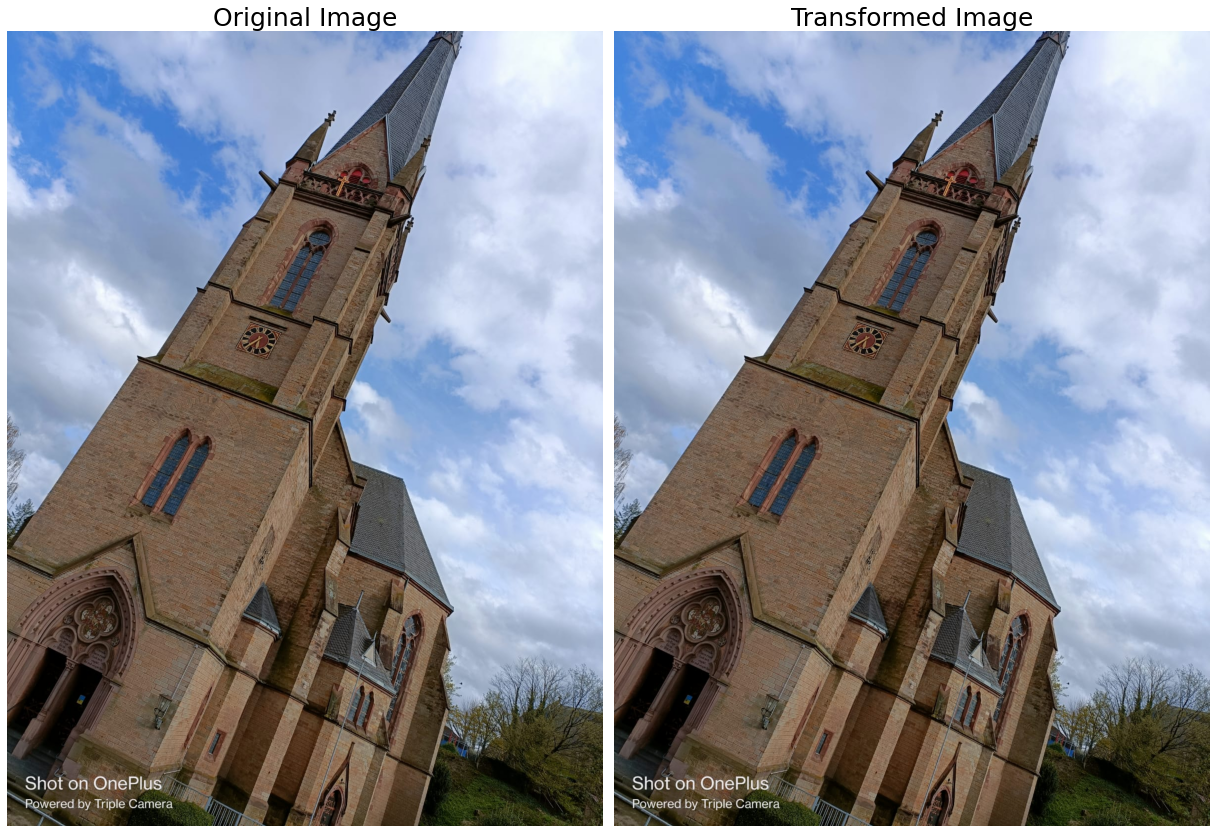

In [75]:
fourier_transform_rgb(light_image)